# Linear Regression Model with Gradient Descent


In [45]:
# Use this in LinearRegression.ipynb to access functions and variables from DataSplitting.ipynb
%run DataSplitting.ipynb

import numpy as np
import copy
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


Training set: (2923, 11) (2923,)
Testing set: (627, 11) (627,)
Validation set: (627, 11) (627,)

Training set:
      Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
2830   0.525     0.430   0.135        0.8435          0.4325          0.1800   
925    0.430     0.325   0.100        0.3645          0.1575          0.0825   
3845   0.455     0.350   0.105        0.4160          0.1625          0.0970   
547    0.205     0.155   0.045        0.0425          0.0170          0.0055   
2259   0.590     0.465   0.160        1.1005          0.5060          0.2525   

      Shell weight   Age  Sex_F  Sex_I  Sex_M  
2830        0.1815  10.5    1.0    0.0    0.0  
925         0.1050   8.5    0.0    1.0    0.0  
3845        0.1450  12.5    0.0    0.0    1.0  
547         0.0155   8.5    0.0    0.0    1.0  
2259        0.2950  14.5    1.0    0.0    0.0  

Testing set:
      Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
3142   0.215     0.165   0

c:\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Linear Regression Model Implementation
Next, we define functions for computing the gradient and performing gradient descent. These functions will be used to train our Linear Regression model.

In [46]:
### Code from assigments

# Functions for Linear Regression and Gradient Descent

def compute_gradient(X, y, w, b):
    m = X.shape[0]
    y_pred = np.dot(X, w) + b
    errors = y_pred - y
    dj_dw = np.dot(X.T, errors) / m
    dj_db = np.sum(errors) / m
    return dj_dw, dj_db

def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    m = len(X)
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        cost = np.mean((np.dot(X, w) + b - y) ** 2) / 2
        J_history.append(cost)
    return w, b, J_history

def predict(X, w, b):
    return np.dot(X, w) + b

# Initialize parameters


In [47]:

initial_w = np.zeros(X_train_scaled.shape[1])
initial_b = 0

# Gradient descent settings
iterations = 1500
alpha = 0.01

X_train_array = X_train.values  # Convert DataFrame to numpy array
y_train_array = y_train.values  # Convert Series to numpy array

# Running gradient descent
w, b, J_history = gradient_descent(X_train_scaled, y_train_array, initial_w, initial_b, alpha, iterations)


## Model Evaluation
After training the model, we evaluate its performance on the validation set. We use metrics such as Mean Squared Error (MSE) and R-squared (R²).


In [48]:

# Predicting on the validation set
y_val_pred = predict(X_val_scaled, w, b)

# Calculating performance metrics
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

mse_val, r2_val

(0.004061627439278236, 0.9996043033694938)


## Visualizations
To better understand the model's performance, we visualize the cost function over iterations and compare the actual vs. predicted values.


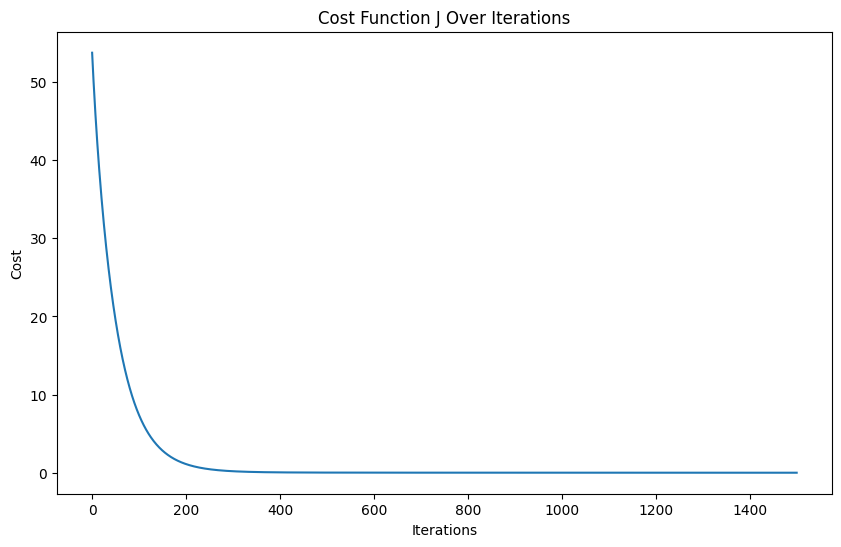

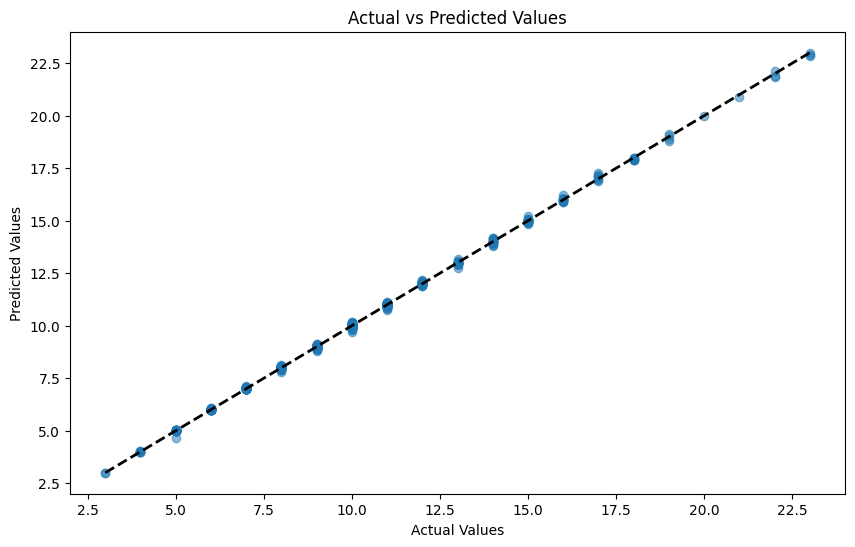

In [49]:

# Plotting the cost function over iterations
plt.figure(figsize=(10, 6))
plt.plot(J_history)
plt.title('Cost Function J Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

# Plotting Predictions vs Actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.show()
